# Exploratory Data Analysis : Haberman's Survival Breast Cancer

## Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer. It is collected from the study of University of Chicago's Billings Hospital between year 1958 to 1970.

### More info about the Dataset :-
* It has four features including class label.
* Column of age have different age group people.
* Year columns tells in which year operation had done.
* Auxillary lymph nodes tells no. of nodes vary from women to women.
* Survival status 1 shows no. of person survived 5 years or more &  survival status 2 shows no. of person died within 5 years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/haberman.csv')

In [4]:
df.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.shape

(306, 4)

In [ ]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
for cols in df.describe(include='all').columns:
  print(cols)
  print(df[cols].unique())

age
[30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 83]
year
[64 62 65 59 58 60 66 61 67 63 69 68]
nodes
[ 1  3  0  2  4 10  9 30  7 13  6 15 21 11  5 23  8 20 52 14 19 16 12 24
 46 18 22 35 17 25 28]
status
[1 2]


## EDA

In [ ]:
df.status.value_counts()

status
1    225
2     81
Name: count, dtype: int64

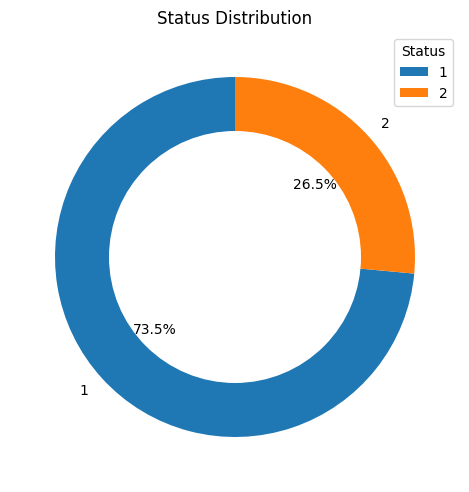

In [ ]:
status_counts = df.status.value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title('Status Distribution')
plt.legend(title='Status')
plt.show()

## 💥 **Age Wise Analysis**

In [6]:
df.age.describe()

,age
count,306.000000
mean,52.457516
std,10.803452
min,30.000000
25%,44.000000
50%,52.000000
75%,60.750000
max,83.000000


In [7]:
bins = [30,35,40,45,50,55,60,65,70,75,80,85]
df['binned_age'] = pd.cut(df['age'], bins=bins,  labels=['30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85'],right=False)
df.head(10)

,age,year,nodes,status,binned_age
0,30,64,1,1,30-35
1,30,62,3,1,30-35
2,30,65,0,1,30-35
3,31,59,2,1,30-35
4,31,65,4,1,30-35
5,33,58,10,1,30-35
6,33,60,0,1,30-35
7,34,59,0,2,30-35
8,34,66,9,2,30-35
9,34,58,30,1,30-35


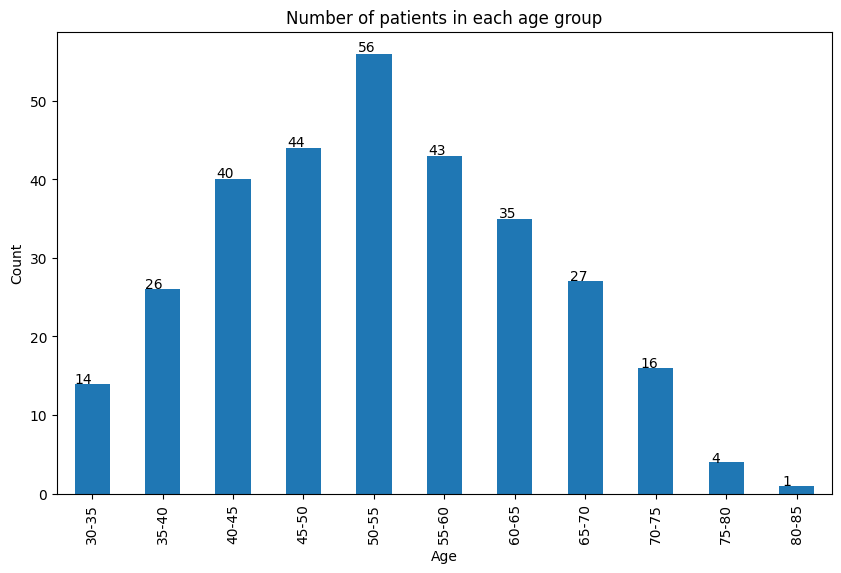

In [8]:
age_counts = df['binned_age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = age_counts.plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Number of patients in each age group")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### ✅ Finding: Most patients are aged under 50-55. i.e. around 18.3% of the total.

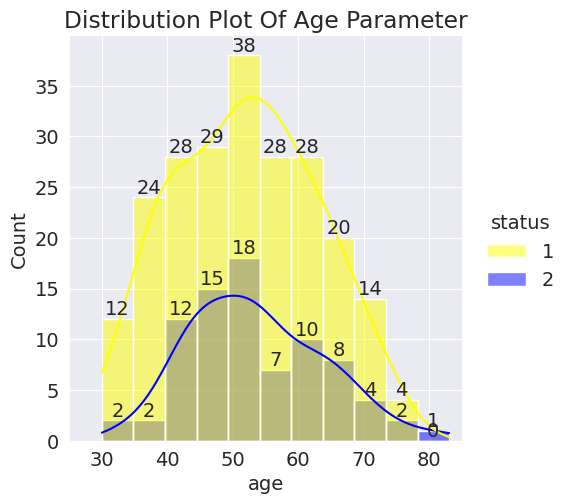

In [ ]:
sns.displot(x='age',hue='status',palette=['yellow','blue'],data=df,kde=True);
plt.title('Distribution Plot Of Age Parameter');

for ax in plt.gcf().axes:
  for bar in ax.containers:
    labels = [f'{v.get_height():.0f}' for v in bar]
    ax.bar_label(bar, labels=labels, label_type='edge')
plt.xlim(25,85)
plt.show()

### ✅ Finding: Among the 81 deceased patients, 4 were between the ages of 30 and 40, which represents approximately 4.9% of the total deceased patient population.

### ✅ Finding: Out of the 81 deceased patients, 45 were aged between 40 and 55, accounting for approximately 55.6% of the total deceased patient population.

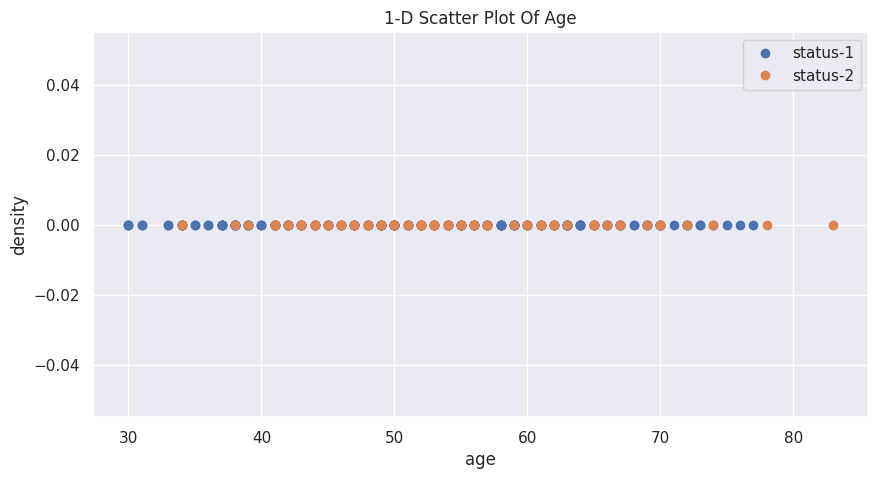

In [ ]:
# 1-D scatter plot

import numpy as np
df_1 = df.loc[df["status"] == 1];
df_2 = df.loc[df["status"] == 2];

#print(df_1["age"])

plt.rcParams.update({'font.size': 15}) #setting font size
label = ['status-1', 'status-2']
plt.plot(df_1["age"], np.zeros_like(df_1['age']), 'o')
plt.plot(df_2["age"], np.zeros_like(df_2['age']), 'o')
plt.title("1-D Scatter Plot Of Age")
plt.xlabel("age" )
plt.ylabel("density")
plt.legend(label)
plt.show()

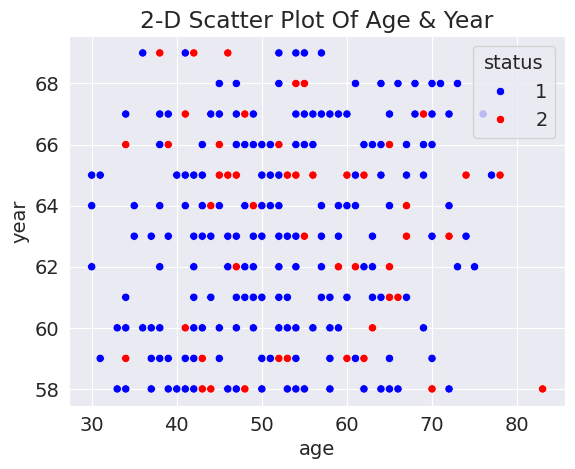

In [ ]:
plt.rcParams['font.size']=14
sns.set_style('darkgrid')
sns.scatterplot(x='age',y='year',hue='status',data=df,palette=['blue','red'])
plt.title("2-D Scatter Plot Of Age & Year")
plt.show()

In [ ]:
df.nodes.describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64

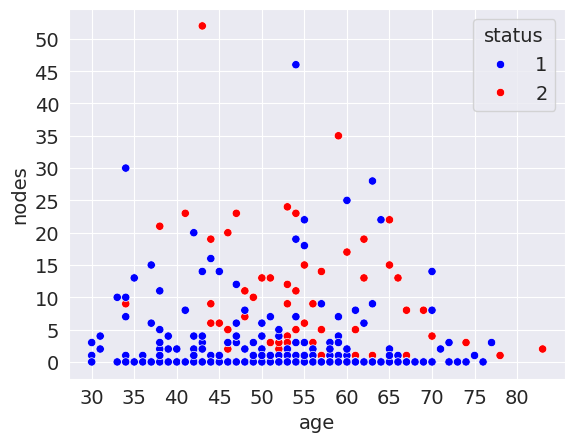

In [ ]:
plt.rcParams['font.size']=14
sns.set_style('darkgrid')
sns.scatterplot(x='age',y='nodes',hue='status',data=df,palette=['blue','red'])

plt.xticks(np.arange(30,85,5))
plt.yticks(np.arange(0,55,5))

plt.show()

## Let's filter the Data having Nodes 5 or less and age 40 or less

In [ ]:
Patient_count_age40_or_less = df[df['age'] <= 40].shape[0]

In [ ]:
# Count of patients having age 40 or less
Percentage = round(Patient_count_age40_or_less*100/df.shape[0],2)
print(f'{Patient_count_age40_or_less= }')
print(f'{Percentage = }%')

Patient_count_age40_or_less= 43
Percentage = 14.05%


In [ ]:
# Count of patients having age 40 or less and  lymph node  5 or less
filtered_df1 = df[(df['age'] <= 40) & (df['nodes'] <= 5)]
patient_count = filtered_df1.shape[0]
print(f'{patient_count = }')
percentage = round((patient_count / df.shape[0]) * 100,2)
print(f'{percentage = }%')

patient_count = 33
percentage = 10.78%


In [ ]:
survived_count1 = filtered_df1[filtered_df1['status'] == 1].shape[0]
non_survived_count1 = filtered_df1[filtered_df1['status'] == 2].shape[0]

In [ ]:
survived_percentage1_by_total = (survived_count1 / df.shape[0]) * 100
survived_percentage1_filtered = (non_survived_count1 / filtered_df1.shape[0]) * 100
non_survived_percentage1_filtered = (survived_count1 / filtered_df1.shape[0]) * 100
non_survived_percentage1_by_total = (non_survived_count1 / df.shape[0]) * 100

# Survived Patients whose age is 40 or less and nodes 5 or less
print(f'{survived_count1=}')

# Not Survived Patients whose age is 40 or less and nodes 5 or less
print(f'{non_survived_count1=}')
print(f'{survived_percentage1_by_total=:.2f}%')
print(f'{non_survived_percentage1_by_total=:.2f}%')
print(f'{survived_percentage1_filtered=:.2f}%')
print(f'{non_survived_percentage1_filtered=:.2f}%')

survived_count1=31
non_survived_count1=2
survived_percentage1_by_total=10.13%
non_survived_percentage1_by_total=0.65%
survived_percentage1_filtered=6.06%
non_survived_percentage1_filtered=93.94%


### ✅Finding: Patients which have less nodes are more likely to survive.
### ✅Finding: 10.13% of the Total Patient that have age 40 or less and lymph node 5 or less have 100% survived from the breast cancer, i.e, almost 94% of their total.



## 💥 **Year Wise Analysis**

In [ ]:
df.year.describe()

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: year, dtype: float64

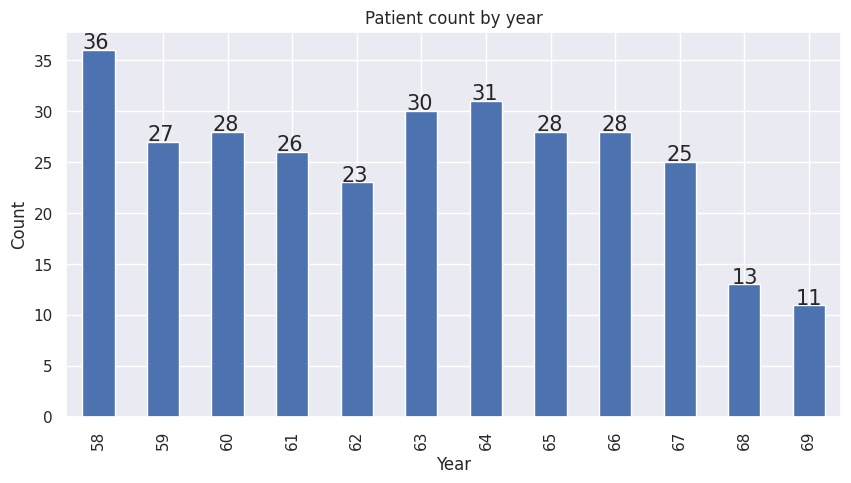

In [ ]:
year_counts = df['year'].value_counts().sort_index()

ax = year_counts.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Patient count by year")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### ✅Finding: In 1958 Most patient came for the the treatment of Breast Cancer.

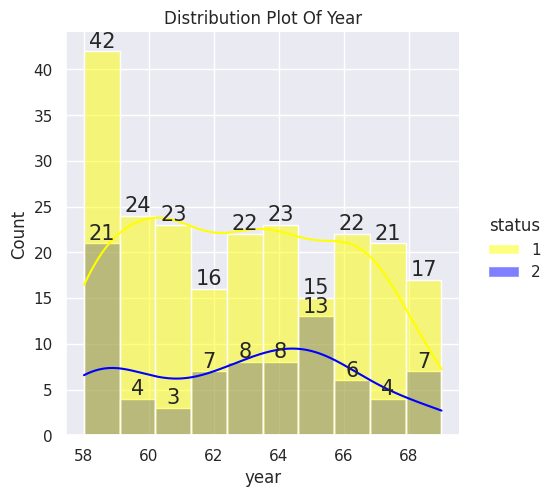

In [ ]:
sns.displot(x='year',hue='status',palette=['yellow','blue'],data=df,kde=True);
plt.title('Distribution Plot Of Year');

for ax in plt.gcf().axes:
  for bar in ax.containers:
    labels = [f'{v.get_height():.0f}' for v in bar]
    ax.bar_label(bar, labels=labels, label_type='edge')

plt.show()

### ✅Finding: During the initial years of treatment, specifically from 1958 to 1959, there was a higher mortality rate among women.

### ✅Finding: People who are treated in later year are more likely to survive may due to proper treatment.


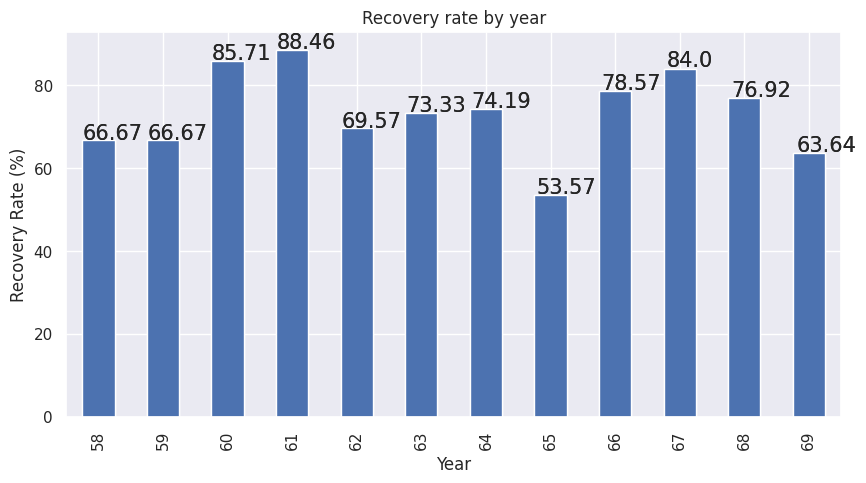

In [ ]:
year_recovery = df.groupby('year')['status'].value_counts().unstack()
year_recovery['recovery_rate'] = (year_recovery[1] / (year_recovery[1] + year_recovery[2])) * 100
year_recovery['recovery_rate'].plot(kind='bar')

ax = year_recovery['recovery_rate'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Recovery Rate (%)")
plt.title("Recovery rate by year")

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### ✅Finding: In the Year 59, 60 and 67 recovery rate are above 84% that show really impressive but in year 62 and 65 recovery rate dropped significantly to 18.89% and 20.62% respectively.

## 💥 Let's do deeper analysis that why the Recovery rate droped significantly in the year 62 and 65.

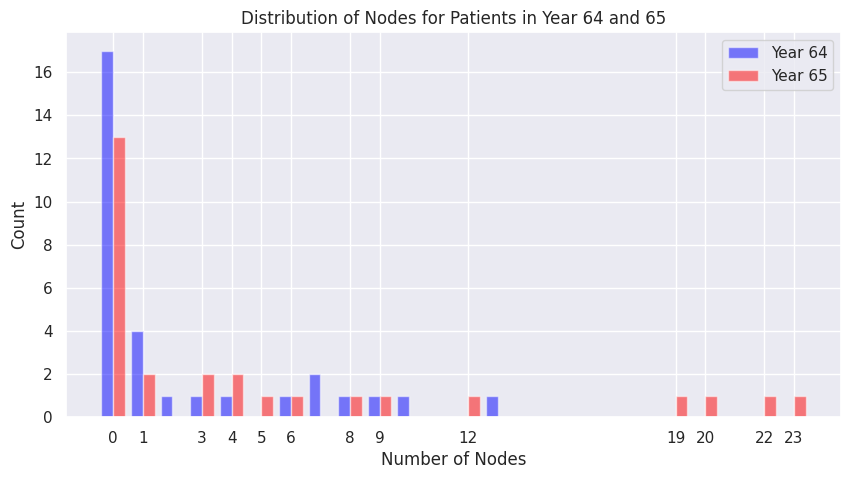

In [ ]:
year_64 = df[df['year'] == 64]
nodes_64 = year_64['nodes'].value_counts().sort_index()

year_65 = df[df['year'] == 65]
nodes_65 = year_65['nodes'].value_counts().sort_index()

plt.bar(nodes_64.index, nodes_64.values, width=0.4, alpha=0.5, label='Year 64', color='blue')
plt.bar(nodes_65.index + 0.4, nodes_65.values, width=0.4, alpha=0.5, label='Year 65', color='red')

plt.xlabel("Number of Nodes")
plt.ylabel("Count")
plt.title("Distribution of Nodes for Patients in Year 64 and 65")
plt.xticks(nodes_65.index + 0.2, nodes_65.index)
plt.legend()
plt.show()

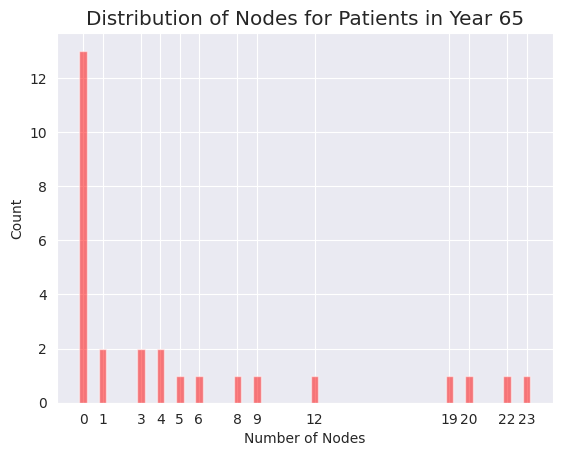

In [ ]:
year_65 = df[df['year'] == 65]
nodes_65 = year_65['nodes'].value_counts().sort_index()

plt.bar(nodes_65.index, nodes_65.values, width=0.4, alpha=0.5, color='red')

plt.rcParams['font.size']=12
plt.xticks(nodes_65.index, nodes_65.index)
plt.xlabel("Number of Nodes")
plt.ylabel("Count")
plt.title("Distribution of Nodes for Patients in Year 65")

plt.show()

In [13]:
year_65 = df[df['year'] == 65]
nodes_status = year_65.groupby('nodes')['status'].value_counts().unstack().fillna(0)
print(nodes_status)

status     1    2
nodes            
0       10.0  3.0
1        0.0  2.0
3        1.0  1.0
4        2.0  0.0
5        0.0  1.0
6        0.0  1.0
8        1.0  0.0
9        0.0  1.0
12       0.0  1.0
19       0.0  1.0
20       0.0  1.0
22       1.0  0.0
23       0.0  1.0


In [14]:
year_65 = df[df['year'] == 65]
result = year_65.groupby(['nodes', 'status'])['age'].agg(['count', 'min', 'max'])
print(result)

              count  min  max
nodes status                 
0     1          10   30   69
      2           3   47   61
1     2           2   53   78
3     1           1   77   77
      2           1   74   74
4     1           2   31   50
5     2           1   54   54
6     2           1   45   45
8     1           1   61   61
9     2           1   56   56
12    2           1   53   53
19    2           1   62   62
20    2           1   46   46
22    1           1   64   64
23    2           1   54   54


### ✅Finding: In 1965, More Petients have nodes greater than 19, so that's why recovery rate is down and other factors may also influence it.

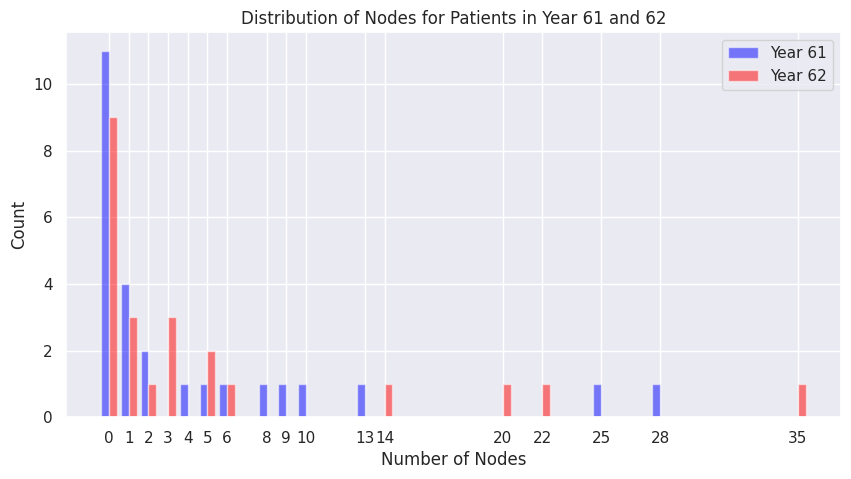

In [ ]:
year_61 = df[df['year'] == 61]
nodes_61 = year_61['nodes'].value_counts().sort_index()

year_62 = df[df['year'] == 62]
nodes_62 = year_62['nodes'].value_counts().sort_index()

all_nodes = nodes_61.index.union(nodes_62.index)

plt.bar(nodes_61.index, nodes_61.values, width=0.4, alpha=0.5, label='Year 61', color='blue')
plt.bar(nodes_62.index + 0.4, nodes_62.values, width=0.4, alpha=0.5, label='Year 62', color='red')

plt.xlabel("Number of Nodes")
plt.ylabel("Count")
plt.title("Distribution of Nodes for Patients in Year 61 and 62")
plt.xticks(all_nodes + 0.2, all_nodes)
plt.legend()
plt.show()

In [9]:
year_62 = df[df['year'] == 62]
nodes_status = year_62.groupby('nodes')['status'].value_counts().unstack().fillna(0)
print(nodes_status)

status    1    2
nodes           
0       8.0  1.0
1       3.0  0.0
2       1.0  0.0
3       2.0  1.0
5       0.0  2.0
6       1.0  0.0
14      0.0  1.0
20      1.0  0.0
22      0.0  1.0
35      0.0  1.0


In [10]:
year_62 = df[df['year'] == 62]
result = year_62.groupby(['nodes', 'status'])['age'].agg(['count', 'min', 'max'])
print(result)

              count  min  max
nodes status                 
0     1           8   46   73
      2           1   47   47
1     1           3   49   75
2     1           1   48   48
3     1           2   30   38
      2           1   52   52
5     2           2   46   61
6     1           1   62   62
14    2           1   57   57
20    1           1   42   42
22    2           1   65   65
35    2           1   59   59


## Node Wise Analysis

In [ ]:
df.nodes.describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64

In [ ]:
df.nodes.value_counts().sort_index()

nodes
0     136
1      41
2      20
3      20
4      13
5       6
6       7
7       7
8       7
9       6
10      3
11      4
12      2
13      5
14      4
15      3
16      1
17      1
18      1
19      3
20      2
21      1
22      3
23      3
24      1
25      1
28      1
30      1
35      1
46      1
52      1
Name: count, dtype: int64

### ✅Finding: 77.12% Patients have 5 nodes or less.
### ✅Finding: 44.4% Patients have 0 node.

In [ ]:
df['nodes_bins'] = pd.cut(df['nodes'], bins=range(0, 60, 5), labels = [f'{i}-{i+5}' for i in range(0, 55, 5)],include_lowest=True, right=True)
print(df.head(20))

    age  year  nodes  status binned_age nodes_bins
0    30    64      1       1      30-35        0-5
1    30    62      3       1      30-35        0-5
2    30    65      0       1      30-35        0-5
3    31    59      2       1      30-35        0-5
4    31    65      4       1      30-35        0-5
5    33    58     10       1      30-35       5-10
6    33    60      0       1      30-35        0-5
7    34    59      0       2      30-35        0-5
8    34    66      9       2      30-35       5-10
9    34    58     30       1      30-35      25-30
10   34    60      1       1      30-35        0-5
11   34    61     10       1      30-35       5-10
12   34    67      7       1      30-35       5-10
13   34    60      0       1      30-35        0-5
14   35    64     13       1      35-40      10-15
15   35    63      0       1      35-40        0-5
16   36    60      1       1      35-40        0-5
17   36    69      0       1      35-40        0-5
18   37    60      0       1   

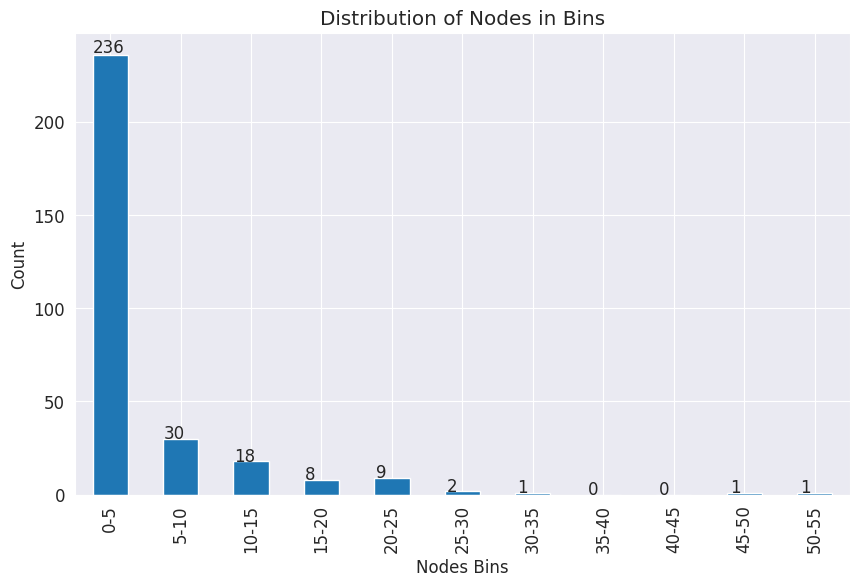

In [ ]:
nodes_bins_counts = df['nodes_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = nodes_bins_counts.plot(kind='bar')
plt.xlabel("Nodes Bins")
plt.ylabel("Count")
plt.title("Distribution of Nodes in Bins")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [ ]:
filtered_df = df[df['nodes_bins'] == '0-5']
survival_status = filtered_df['status'].value_counts()
print(survival_status)

status
1    190
2     46
Name: count, dtype: int64


### ✅Finding: 80.5% Patients are successfully survived that have nodes 5 or less.
### ✅Finding: 19.5% Patients are not survived that have nodes 5 or less.

In [ ]:
filtered_df = df[df['nodes_bins'] <= '10-15']
survival_status = filtered_df['status'].value_counts()
print(survival_status)

status
1    215
2     69
Name: count, dtype: int64


### ✅Finding: 75.7% Patients are succuessfilly survived whose nodes are 15 or less.
### ✅Finding: 24.3% Patients are not survived having nodes 15 or less.

In [ ]:
df[df.nodes > 15].status.value_counts()

status
2    12
1    10
Name: count, dtype: int64

### ✅Finding: 7.1% Patients are those who have nodes are more than 15.
### ✅Finding: In that 54.5% Patients are died and 45.45% are survived

## 🚀 Nodes VS Age Comparison

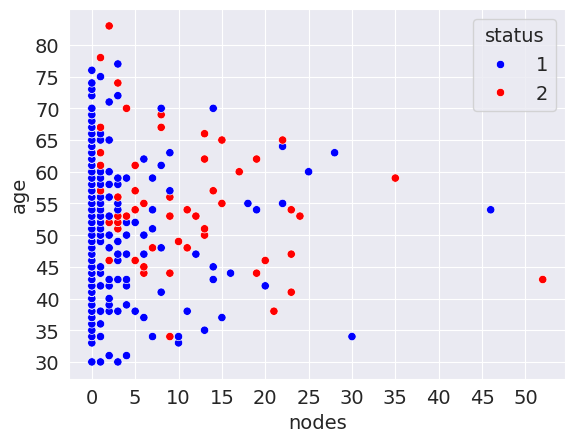

In [ ]:
plt.rcParams['font.size']=14
sns.set_style('darkgrid')
sns.scatterplot(x='nodes',y='age',hue='status',data=df,palette=['blue','red'])

plt.xticks(np.arange(0,55,5))
plt.yticks(np.arange(30,85,5))

plt.show()

## Let's see what is the reason behind 45.5% of successful survival despite of Lymph node greater than 15, may be they have age 40 or less.

In [ ]:
df[(df['nodes'] > 15) & (df['status'] == 1)][['status','age']]

,status,age
9,1,34
59,1,42
79,1,44
174,1,54
177,1,54
185,1,55
188,1,55
227,1,60
252,1,63
254,1,64


## I was Wrong 1 out of 10 have age less than 40. But still the question is what factor influence to their survival. Let's see the Operational Year.

In [ ]:
df[(df['nodes'] > 15) & (df['status'] == 1)][['status','age','year']]

,status,age,year
9,1,34,58
59,1,42,62
79,1,44,67
174,1,54,67
177,1,54,63
185,1,55,66
188,1,55,69
227,1,60,61
252,1,63,61
254,1,64,65


### ✅Finding: Most pateint survived having nodes greater than 15 and age more than 40 due to their operation in the year that have higher recovery rate like 1961, 1962, 1966 & 1967.

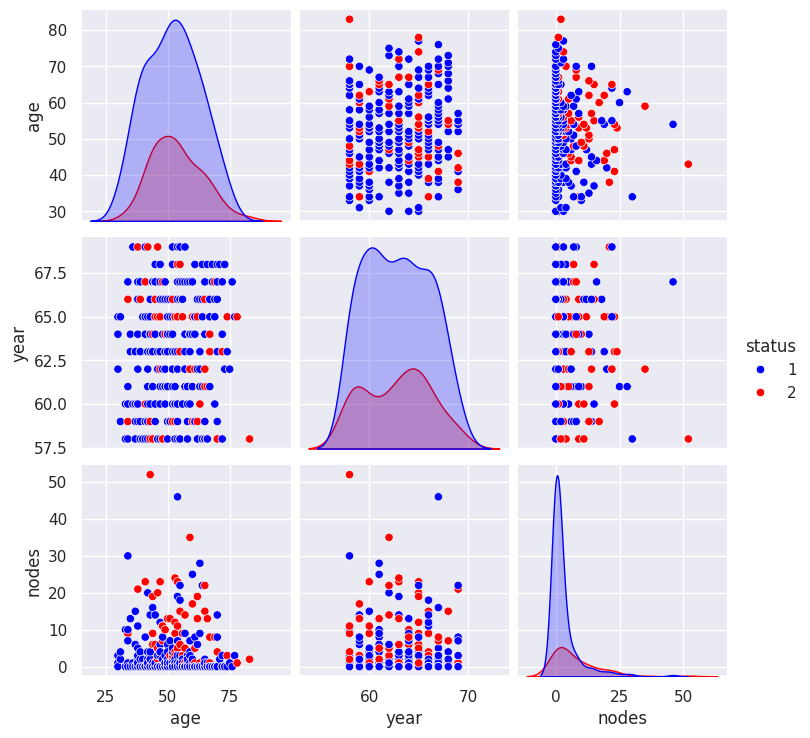

In [ ]:
plt.close;
sns.set(rc={'figure.figsize':(25,10)})
sns.pairplot(x_vars=['age','year','nodes'],y_vars=['age','year','nodes'],hue='status',data=df,palette=['blue','red']);

## ⚾ **Overall Conclusion**:


*   **Age** :
      1) Most patients are aged under 50-55. i.e. around 18.3% of the total.

       2) 10.13% of the Total Patients that have age 40 or less and have lymph node 5 or less have 100% survived from the breast cancer, i.e, almost 94% of their total.

     3) Among the 81 deceased patients, 4 were between the ages of 30 and 40, which represents approximately 4.9% of the total deceased patient population.

     4) Out of the 81 deceased patients, 45 were aged between 40 and 55, accounting for approximately 55.6% of the total deceased patient population.


*  **Year** :

     1) In 1958 Most patient came for the the treatment of Breast Cancer.

     2) During the initial years of treatment, specifically from 1958 to 1959, there was a higher mortality rate among women.

     3) People who are treated in later year are more likely to survive may due to proper treatment.

     4) In the Year 59, 60 and 67 recovery rate are above 84% that show really impressive but in year 62 and 65 recovery rate dropped significantly to 18.89% and 20.62% respectively.

     5) In 1965, More Petients have nodes greater than 19, so that's why recovery rate is down and other factors may also influence it.

* **Nodes** :

     1) Patients which have less nodes are more likely to survive.

     2) 77.12% Patients have 5 nodes or less.

     3) 44.4% Patients have 0 node.

     4) 80.5% Patients are successfully survived that have nodes 5 or less.

     5) 19.5% Patients are not survived that have nodes 5 or less.

     6)75.7% Patients are succuessfilly survived whose nodes are 15 or less.

     7) 24.3% Patients are not survived having nodes 15 or less.

     8) 7.1% Patients are those who have nodes are more than 15.

     9) n that 54.5% Patients are died and 45.45% are survived

     10) Most pateint survived having nodes greater than 15 and age more than 40 due to their operation in the year that have higher recovery rate like 1961, 1962, 1966 & 1967.

   

